# WB AutoML - projekt
### Kamień milowy 5
##### Grupa KTR
Ewaluacja funkcji przygotowującej zbiory danych do użycia FLAML.

Import bibliotek:

In [2]:
import openml
from team5 import OurFlaml
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np

Wybieramy 20 zbiorów z benchmarku https://www.openml.org/search?type=study&study_type=task&id=218&sort=tasks_included. Konkretnie, wynieramy id tasku, do którego przypisany jest dany zbiór.

In [3]:
tasks_ids = [31,3,10101,3917,145836,53,12,9952,14965,9977,9981,34539,146606,7592,146822,146195,146821,167119,
            146818,167120]
#zrodlo: https://www.openml.org/search?type=study&study_type=task&id=218&sort=tasks_included
#(nie wszystkie zadania ze zbioru z powyzszego linku wykorzystane)

Wykonujemy test - pobieramy zbiór przypisany dla każdego `task_id`, wykonujemy na nim naszą metodę przygotowującą do pakietu FLAML i wykonującą go, zapisujemy nazwę zbioru, uzyskane accuracy oraz czas trenowania najlepszej konfiguracji. Budżet czasowy jest ustawiony domyślnie, a więc na 60 sekund.

In [4]:
times = []
names = []
aucs = []

In [7]:
for task_id in tasks_ids:
    dataset = openml.tasks.get_task(task_id).get_dataset()
    data_x, data_y, a, b = dataset.get_data(
        dataset_format='array',
        target = dataset.default_target_attribute
    )
    data_x = pd.DataFrame(data_x)
    data_y = pd.Series(data_y)
    flaml = OurFlaml.OurFlaml()
    flaml.fit(data_x,data_y, cv=KFold(n_splits=10, random_state=444, shuffle=True),n_jobs=-1)
    names.append(dataset.name)
    aucs.append(1.0000 - flaml.ml.best_loss)
    times.append(flaml.ml.best_config_train_time)

[flaml.automl: 04-28 12:30:54] {2105} INFO - task = classification
[flaml.automl: 04-28 12:30:54] {2107} INFO - Data split method: KFold(n_splits=10, random_state=444, shuffle=True)
[flaml.automl: 04-28 12:30:54] {2111} INFO - Evaluation method: cv
[flaml.automl: 04-28 12:30:54] {2188} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl: 04-28 12:30:54] {2281} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 04-28 12:30:54] {2567} INFO - iteration 0, current learner lgbm
[flaml.automl: 04-28 12:30:54] {2697} INFO - Estimated sufficient time budget=1540s. Estimated necessary time budget=35s.
[flaml.automl: 04-28 12:30:54] {2744} INFO -  at 0.2s,	estimator lgbm's best error=0.2715,	best estimator lgbm's best error=0.2715
[flaml.automl: 04-28 12:30:54] {2567} INFO - iteration 1, current learner lgbm
[flaml.automl: 04-28 12:30:54] {2744} INFO -  at 0.3s,	estimator lgbm's best error=0.2715,	best estimator lgbm's b

[flaml.automl: 04-28 12:30:56] {2744} INFO -  at 1.8s,	estimator extra_tree's best error=0.2681,	best estimator lgbm's best error=0.2169
[flaml.automl: 04-28 12:30:56] {2567} INFO - iteration 12, current learner extra_tree
[flaml.automl: 04-28 12:30:56] {2744} INFO -  at 2.3s,	estimator extra_tree's best error=0.2435,	best estimator lgbm's best error=0.2169
[flaml.automl: 04-28 12:30:56] {2567} INFO - iteration 13, current learner rf
[flaml.automl: 04-28 12:30:57] {2744} INFO -  at 2.9s,	estimator rf's best error=0.2762,	best estimator lgbm's best error=0.2169
[flaml.automl: 04-28 12:30:57] {2567} INFO - iteration 14, current learner lgbm
[flaml.automl: 04-28 12:30:57] {2744} INFO -  at 3.1s,	estimator lgbm's best error=0.2169,	best estimator lgbm's best error=0.2169
[flaml.automl: 04-28 12:30:57] {2567} INFO - iteration 15, current learner rf
[flaml.automl: 04-28 12:30:57] {2744} INFO -  at 3.3s,	estimator rf's best error=0.2473,	best estimator lgbm's best error=0.2169
[flaml.automl: 

[flaml.automl: 04-28 12:31:01] {2567} INFO - iteration 34, current learner lgbm
[flaml.automl: 04-28 12:31:01] {2744} INFO -  at 7.7s,	estimator lgbm's best error=0.2120,	best estimator lgbm's best error=0.2120
[flaml.automl: 04-28 12:31:01] {2567} INFO - iteration 35, current learner lgbm
[flaml.automl: 04-28 12:31:02] {2744} INFO -  at 7.9s,	estimator lgbm's best error=0.2120,	best estimator lgbm's best error=0.2120
[flaml.automl: 04-28 12:31:02] {2567} INFO - iteration 36, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas imp

[flaml.automl: 04-28 12:31:04] {2744} INFO -  at 9.8s,	estimator xgboost's best error=0.2360,	best estimator lgbm's best error=0.2120
[flaml.automl: 04-28 12:31:04] {2567} INFO - iteration 45, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:31:05] {2744} INFO -  at 11.0s,	estimator xgboost's best error=0.2223,	best estimator lgbm's best error=0.2120
[flaml.automl: 04-28 12:31:05] {2567} INFO - iteration 51, current learner lgbm
[flaml.automl: 04-28 12:31:05] {2744} INFO -  at 11.1s,	estimator lgbm's best error=0.2120,	best estimator lgbm's best error=0.2120
[flaml.automl: 04-28 12:31:05] {2567} INFO - iteration 52, current learner lgbm
[flaml.automl: 04-28 12:31:05] {2744} INFO -  at 11.4s,	estimator lgbm's best error=0.2120,	best estimator lgbm's best error=0.2120
[flaml.automl: 04-28 12:31:05] {2567} INFO - iteration 53, current learner lgbm
[flaml.automl: 04-28 12:31:05] {2744} INFO -  at 11.5s,	estimator lgbm's best error=0.2120,	best est

[flaml.automl: 04-28 12:31:15] {2567} INFO - iteration 76, current learner lgbm
[flaml.automl: 04-28 12:31:15] {2744} INFO -  at 21.5s,	estimator lgbm's best error=0.2001,	best estimator lgbm's best error=0.2001
[flaml.automl: 04-28 12:31:15] {2567} INFO - iteration 77, current learner lgbm
[flaml.automl: 04-28 12:31:18] {2744} INFO -  at 23.8s,	estimator lgbm's best error=0.2001,	best estimator lgbm's best error=0.2001
[flaml.automl: 04-28 12:31:18] {2567} INFO - iteration 78, current learner lgbm
[flaml.automl: 04-28 12:31:18] {2744} INFO -  at 24.1s,	estimator lgbm's best error=0.2001,	best estimator lgbm's best error=0.2001
[flaml.automl: 04-28 12:31:18] {2567} INFO - iteration 79, current learner lgbm
[flaml.automl: 04-28 12:31:19] {2744} INFO -  at 25.6s,	estimator lgbm's best error=0.2001,	best estimator lgbm's best error=0.2001
[flaml.automl: 04-28 12:31:19] {2567} INFO - iteration 80, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: Futur

[flaml.automl: 04-28 12:31:31] {2567} INFO - iteration 92, current learner xgb_limitdepth
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be remo

[flaml.automl: 04-28 12:31:32] {2744} INFO -  at 38.5s,	estimator xgb_limitdepth's best error=0.2201,	best estimator lgbm's best error=0.2001
[flaml.automl: 04-28 12:31:32] {2567} INFO - iteration 95, current learner xgb_limitdepth
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiInd

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:31:33] {2744} INFO -  at 39.4s,	estimator xgb_limitdepth's best error=0.2201,	best estimator lgbm's best error=0.2001
[flaml.automl: 04-28 12:31:33] {2567} INFO - iteration 98, current learner xgb_limitdepth
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiInd

[flaml.automl: 04-28 12:31:34] {2744} INFO -  at 40.3s,	estimator xgb_limitdepth's best error=0.2174,	best estimator lgbm's best error=0.2001
[flaml.automl: 04-28 12:31:34] {2567} INFO - iteration 101, current learner xgb_limitdepth
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIn

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:31:40] {2744} INFO -  at 46.5s,	estimator xgb_limitdepth's best error=0.2174,	best estimator lgbm's best error=0.2001
[flaml.automl: 04-28 12:31:40] {2567} INFO - iteration 110, current learner

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[flaml.automl: 04-28 12:31:51] {2567} INFO - iteration 127, current learner lgbm
[flaml.automl: 04-28 12:31:51] {2744} INFO -  at 57.3s,	estimator lgbm's best error=0.2001,	best estimator lgbm's best error=0.2001
[flaml.automl: 04-28 12:31:51] {2567} INFO - iteration 128, current learner lgbm
[flaml.automl: 04-28 12:31:51] {2744} INFO -  at 57.4s,	estimator lgbm's best error=0.2001,	best estimator lgbm's best error=0.2001
[flaml.automl: 04-28 12:31:51] {2567} INFO - iteration 129, current learner xgb_limitdepth
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  fro

C:\Users\micha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[flaml.automl: 04-28 12:31:54] {2744} INFO -  at 60.0s,	estimator lrl1's best error=0.5302,	best estimator lgbm's best error=0.2001
[flaml.automl: 04-28 12:31:54] {2974} INFO - retrain lgbm for 0.2s
[flaml.automl: 04-28 12:31:54] {2981} INFO - retrained model: LGBMClassifier(colsample_bytree=0.9224720558919963,
               learning_rate=0.02530041535782935, max_bin=1023,
               min_child_samples=12, n_estimators=348, num_leaves=5,
               reg_alpha=0.001640988178117243, reg_lambda=0.012576612224667666,
               verbose=-1)
[flaml.automl: 04-28 12:31:54] {2310} INFO - fit succeeded
[flaml.automl: 04-28 12:31:54] {2311} INFO - Time taken to find the best model: 21.098905086517334
[flaml.automl: 04-28 12:31:55] {2105} INFO - task = classification
[flaml.automl: 04-28 12:31:55] {2107} INFO -

[flaml.automl: 04-28 12:31:56] {2744} INFO -  at 1.6s,	estimator lgbm's best error=0.0659,	best estimator lgbm's best error=0.0659
[flaml.automl: 04-28 12:31:56] {2567} INFO - iteration 8, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\U

[flaml.automl: 04-28 12:31:57] {2744} INFO -  at 2.5s,	estimator xgboost's best error=0.0212,	best estimator xgboost's best error=0.0212
[flaml.automl: 04-28 12:31:57] {2567} INFO - iteration 12, current learner rf
[flaml.automl: 04-28 12:31:57] {2744} INFO -  at 2.8s,	estimator rf's best error=0.0792,	best estimator xgboost's best error=0.0212
[flaml.automl: 04-28 12:31:57] {2567} INFO - iteration 13, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboo

[flaml.automl: 04-28 12:32:00] {2744} INFO -  at 5.0s,	estimator xgboost's best error=0.0210,	best estimator xgboost's best error=0.0210
[flaml.automl: 04-28 12:32:00] {2567} INFO - iteration 21, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Ind

[flaml.automl: 04-28 12:32:02] {2744} INFO -  at 7.3s,	estimator xgboost's best error=0.0178,	best estimator xgboost's best error=0.0178
[flaml.automl: 04-28 12:32:02] {2567} INFO - iteration 27, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Ind

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:32:02] {2744} INFO -  at 8.0s,	estimator xgboost's best error=0.0074,	best estimator xgboost's best error=0.0074
[flaml.automl: 04-28 12:32:02] {2567} INFO - iteration 30, current learner lgbm
[flaml.automl: 04-28 12:32:03] {2744} INFO -  at 8.1s,	estimator lgbm's best error=0.0413,	best estimator xgboost's best error=0.0074
[flaml.automl: 04-28 12:32:03] {2567} INFO - iteration 31, current learner lgbm
[flaml.automl: 04-28 12:32:03] {2744} INFO -  at 8.3s,	estimator lgbm's best error=0.0413,	best estimator xgboost's best error=0.0074
[flaml.automl: 04-28 12:32:03] {2567} INFO - iteration 32, current learner rf
[flaml.automl: 04-28 12:32:03] {2744} INFO -  at 8.6s,	estimator rf's best error=0.0178,	best es

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:32:05] {2744} INFO -  at 10.4s,	estimator xgboost's best error=0.0074,	best estimator xgboost's best error=0.0074
[flaml.automl: 04-28 12:32:05] {2567} INFO - iteration 39, current learner rf
[

[flaml.automl: 04-28 12:32:07] {2744} INFO -  at 12.7s,	estimator xgboost's best error=0.0074,	best estimator xgboost's best error=0.0074
[flaml.automl: 04-28 12:32:07] {2567} INFO - iteration 46, current learner rf
[flaml.automl: 04-28 12:32:08] {2744} INFO -  at 13.2s,	estimator rf's best error=0.0077,	best estimator xgboost's best error=0.0074
[flaml.automl: 04-28 12:32:08] {2567} INFO - iteration 47, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgb

[flaml.automl: 04-28 12:32:16] {2567} INFO - iteration 60, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed fro

[flaml.automl: 04-28 12:32:18] {2744} INFO -  at 23.1s,	estimator xgboost's best error=0.0040,	best estimator rf's best error=0.0008
[flaml.automl: 04-28 12:32:18] {2567} INFO - iteration 64, current learner lgbm
[flaml.automl: 04-28 12:32:18] {2744} INFO -  at 23.3s,	estimator lgbm's best error=0.0413,	best estimator rf's best error=0.0008
[flaml.automl: 04-28 12:32:18] {2567} INFO - iteration 65, current learner rf
[flaml.automl: 04-28 12:32:18] {2744} INFO -  at 23.9s,	estimator rf's best error=0.0008,	best estimator rf's best error=0.0008
[flaml.automl: 04-28 12:32:18] {2567} INFO - iteration 66, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is depreca

[flaml.automl: 04-28 12:32:22] {2567} INFO - iteration 78, current learner lgbm
[flaml.automl: 04-28 12:32:23] {2744} INFO -  at 28.1s,	estimator lgbm's best error=0.0098,	best estimator rf's best error=0.0008
[flaml.automl: 04-28 12:32:23] {2567} INFO - iteration 79, current learner lgbm
[flaml.automl: 04-28 12:32:23] {2744} INFO -  at 28.2s,	estimator lgbm's best error=0.0098,	best estimator rf's best error=0.0008
[flaml.automl: 04-28 12:32:23] {2567} INFO - iteration 80, current learner extra_tree
[flaml.automl: 04-28 12:32:23] {2744} INFO -  at 28.7s,	estimator extra_tree's best error=0.0031,	best estimator rf's best error=0.0008
[flaml.automl: 04-28 12:32:23] {2567} INFO - iteration 81, current learner lgbm
[flaml.automl: 04-28 12:32:23] {2744} INFO -  at 28.8s,	estimator lgbm's best error=0.0098,	best estimator rf's best error=0.0008
[flaml.automl: 04-28 12:32:23] {2567} INFO - iteration 82, current learner extra_tree
[flaml.automl: 04-28 12:32:24] {2744} INFO -  at 29.1s,	estima

[flaml.automl: 04-28 12:32:43] {2744} INFO -  at 48.7s,	estimator xgboost's best error=0.0025,	best estimator extra_tree's best error=0.0006
[flaml.automl: 04-28 12:32:43] {2567} INFO - iteration 115, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:32:44] {2744} INFO -  at 49.8s,	estimator xgboost's best error=0.0013,	best estimator extra_tree's best error=0.0006
[flaml.automl: 04-28 12:32:44] {2567} INFO - iteration 119, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:32:45] {2744} INFO -  at 50.7s,	estimator xgboost's best error=0.0013,	best estimator extra_tree's best error=0.0006
[flaml.automl: 04-28 12:32:45] {2567} INFO - iteration 123, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:32:49] {2744} INFO -  at 54.0s,	estimator xgboost's best error=0.0011,	best estimator rf's best error=0.0006
[flaml.automl: 04-28 12:32:49] {2567} INFO - iteration 130, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[flaml.automl: 04-28 12:32:54] {2744} INFO -  at 59.6s,	estimator xgboost's best error=0.0011,	best estimator rf's best error=0.0006
[flaml.automl: 04-28 12:32:54] {2567} INFO - iteration 140, current learner extra_tree
[flaml.automl: 04-28 12:32:54] {2744} INFO -  at 59.9s,	estimator extra_tree's best error=0.0006,	best estimator rf's best error=0.0006
[flaml.automl: 04-28 12:32:54] {2567} INFO - iteration 141, current learner xgb_limitdepth
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\si

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:32:56] {2744} INFO -  at 1.0s,	estimator xgboost's best error=0.2744,	best estimator lgbm's best error=0.2735
[flaml.automl: 04-28 12:32:56] {2567} INFO - iteration 10, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[flaml.automl: 04-28 12:32:58] {2567} INFO - iteration 21, current learner extra_tree
[flaml.automl: 04-28 12:32:59] {2744} INFO -  at 3.8s,	estimator extra_tree's best error=0.2634,	best estimator extra_tree's best error=0.2634
[flaml.automl: 04-28 12:32:59] {2567} INFO - iteration 22, current learner lgbm
[flaml.automl: 04-28 12:32:59] {2744} INFO -  at 3.9s,	estimator lgbm's best error=0.2735,	best estimator extra_tree's best error=0.2634
[flaml.automl: 04-28 12:32:59] {2567} INFO - iteration 23, current learner lgbm
[flaml.automl: 04-28 12:32:59] {2744} INFO -  at 4.0s,	estimator lgbm's best error=0.2735,	best estimator extra_tree's best error=0.2634
[flaml.automl: 04-28 12:32:59] {2567} INFO - iteration 24, current learner extra_tree
[flaml.automl: 04-28 12:32:59] {2744} INFO -  at 4.3s,	estimator extra_tree's best error=0.2618,	best estimator extra_tree's best error=0.2618
[flaml.automl: 04-28 12:32:59] {2567} INFO - iteration 25, current learner extra_tree
[flaml.automl: 04-28 1

[flaml.automl: 04-28 12:33:03] {2744} INFO -  at 8.0s,	estimator rf's best error=0.2704,	best estimator extra_tree's best error=0.2584
[flaml.automl: 04-28 12:33:03] {2567} INFO - iteration 35, current learner extra_tree
[flaml.automl: 04-28 12:33:03] {2744} INFO -  at 8.8s,	estimator extra_tree's best error=0.2571,	best estimator extra_tree's best error=0.2571
[flaml.automl: 04-28 12:33:03] {2567} INFO - iteration 36, current learner extra_tree
[flaml.automl: 04-28 12:33:04] {2744} INFO -  at 9.4s,	estimator extra_tree's best error=0.2551,	best estimator extra_tree's best error=0.2551
[flaml.automl: 04-28 12:33:04] {2567} INFO - iteration 37, current learner extra_tree
[flaml.automl: 04-28 12:33:05] {2744} INFO -  at 10.4s,	estimator extra_tree's best error=0.2551,	best estimator extra_tree's best error=0.2551
[flaml.automl: 04-28 12:33:05] {2567} INFO - iteration 38, current learner extra_tree
[flaml.automl: 04-28 12:33:05] {2744} INFO -  at 10.7s,	estimator extra_tree's best error=0

[flaml.automl: 04-28 12:33:13] {2567} INFO - iteration 53, current learner xgb_limitdepth
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be remo

[flaml.automl: 04-28 12:33:28] {2567} INFO - iteration 68, current learner rf
[flaml.automl: 04-28 12:33:29] {2744} INFO -  at 34.3s,	estimator rf's best error=0.2497,	best estimator rf's best error=0.2497
[flaml.automl: 04-28 12:33:29] {2567} INFO - iteration 69, current learner lgbm
[flaml.automl: 04-28 12:33:29] {2744} INFO -  at 34.4s,	estimator lgbm's best error=0.2717,	best estimator rf's best error=0.2497
[flaml.automl: 04-28 12:33:29] {2567} INFO - iteration 70, current learner rf
[flaml.automl: 04-28 12:33:31] {2744} INFO -  at 36.4s,	estimator rf's best error=0.2497,	best estimator rf's best error=0.2497
[flaml.automl: 04-28 12:33:31] {2567} INFO - iteration 71, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-

[flaml.automl: 04-28 12:33:32] {2567} INFO - iteration 74, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed fro

[flaml.automl: 04-28 12:33:36] {2744} INFO -  at 41.1s,	estimator xgboost's best error=0.2701,	best estimator rf's best error=0.2497
[flaml.automl: 04-28 12:33:36] {2567} INFO - iteration 79, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:33:39] {2744} INFO -  at 44.7s,	estimator xgboost's best error=0.2701,	best estimator rf's best error=0.2497
[flaml.automl: 04-28 12:33:39] {2567} INFO - iteration 84, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[flaml.automl: 04-28 12:33:47] {2567} INFO - iteration 94, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed fro

[flaml.automl: 04-28 12:33:48] {2567} INFO - iteration 98, current learner rf
[flaml.automl: 04-28 12:33:49] {2744} INFO -  at 54.0s,	estimator rf's best error=0.2497,	best estimator rf's best error=0.2497
[flaml.automl: 04-28 12:33:49] {2567} INFO - iteration 99, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the

[flaml.automl: 04-28 12:33:53] {2567} INFO - iteration 104, current learner lgbm
[flaml.automl: 04-28 12:33:53] {2744} INFO -  at 58.4s,	estimator lgbm's best error=0.2717,	best estimator rf's best error=0.2497
[flaml.automl: 04-28 12:33:53] {2567} INFO - iteration 105, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index wi

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[flaml.automl: 04-28 12:33:56] {2567} INFO - iteration 11, current learner extra_tree
[flaml.automl: 04-28 12:33:57] {2744} INFO -  at 1.8s,	estimator extra_tree's best error=0.2063,	best estimator extra_tree's best error=0.2063
[flaml.automl: 04-28 12:33:57] {2567} INFO - iteration 12, current learner extra_tree
[flaml.automl: 04-28 12:33:57] {2744} INFO -  at 2.2s,	estimator extra_tree's best error=0.2028,	best estimator extra_tree's best error=0.2028
[flaml.automl: 04-28 12:33:57] {2567} INFO - iteration 13, current learner rf
[flaml.automl: 04-28 12:33:58] {2744} INFO -  at 2.8s,	estimator rf's best error=0.2029,	best estimator extra_tree's best error=0.2028
[flaml.automl: 04-28 12:33:58] {2567} INFO - iteration 14, current learner rf
[flaml.automl: 04-28 12:33:58] {2744} INFO -  at 3.4s,	estimator rf's best error=0.2029,	best estimator extra_tree's best error=0.2028
[flaml.automl: 04-28 12:33:58] {2567} INFO - iteration 15, current learner extra_tree
[flaml.automl: 04-28 12:33:59]

[flaml.automl: 04-28 12:34:02] {2567} INFO - iteration 25, current learner extra_tree
[flaml.automl: 04-28 12:34:03] {2744} INFO -  at 8.6s,	estimator extra_tree's best error=0.1969,	best estimator extra_tree's best error=0.1969
[flaml.automl: 04-28 12:34:03] {2567} INFO - iteration 26, current learner rf
[flaml.automl: 04-28 12:34:05] {2744} INFO -  at 9.8s,	estimator rf's best error=0.1985,	best estimator extra_tree's best error=0.1969
[flaml.automl: 04-28 12:34:05] {2567} INFO - iteration 27, current learner extra_tree
[flaml.automl: 04-28 12:34:05] {2744} INFO -  at 10.4s,	estimator extra_tree's best error=0.1969,	best estimator extra_tree's best error=0.1969
[flaml.automl: 04-28 12:34:05] {2567} INFO - iteration 28, current learner extra_tree
[flaml.automl: 04-28 12:34:07] {2744} INFO -  at 11.7s,	estimator extra_tree's best error=0.1935,	best estimator extra_tree's best error=0.1935
[flaml.automl: 04-28 12:34:07] {2567} INFO - iteration 29, current learner extra_tree
[flaml.autom

[flaml.automl: 04-28 12:34:13] {2567} INFO - iteration 40, current learner extra_tree
[flaml.automl: 04-28 12:34:13] {2744} INFO -  at 18.4s,	estimator extra_tree's best error=0.1798,	best estimator extra_tree's best error=0.1798
[flaml.automl: 04-28 12:34:13] {2567} INFO - iteration 41, current learner extra_tree
[flaml.automl: 04-28 12:34:15] {2744} INFO -  at 19.8s,	estimator extra_tree's best error=0.1798,	best estimator extra_tree's best error=0.1798
[flaml.automl: 04-28 12:34:15] {2567} INFO - iteration 42, current learner lgbm
[flaml.automl: 04-28 12:34:15] {2744} INFO -  at 19.9s,	estimator lgbm's best error=0.2085,	best estimator extra_tree's best error=0.1798
[flaml.automl: 04-28 12:34:15] {2567} INFO - iteration 43, current learner extra_tree
[flaml.automl: 04-28 12:34:15] {2744} INFO -  at 20.4s,	estimator extra_tree's best error=0.1798,	best estimator extra_tree's best error=0.1798
[flaml.automl: 04-28 12:34:15] {2567} INFO - iteration 44, current learner extra_tree
[flaml

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:34:21] {2744} INFO -  at 26.6s,	estimator xgboost's best error=0.2156,	best estimator extra_tree's best error=0.1781
[flaml.automl: 04-28 12:34:21] {2567} INFO - iteration 53, current learner rf
[flaml.automl: 04-28 12:34:23] {2744} INFO -  at 27.9s,	estimator rf's best error=0.1947,	best estimator extra_tree's best error=0.1781
[flaml.automl: 04-28 12:34:23] {2567} INFO - iteration 54, current learner lgbm
[flaml.automl: 04-28 12:34:23] {2744} INFO 

[flaml.automl: 04-28 12:34:30] {2744} INFO -  at 35.1s,	estimator extra_tree's best error=0.1778,	best estimator extra_tree's best error=0.1778
[flaml.automl: 04-28 12:34:30] {2567} INFO - iteration 64, current learner rf
[flaml.automl: 04-28 12:34:31] {2744} INFO -  at 36.4s,	estimator rf's best error=0.1878,	best estimator extra_tree's best error=0.1778
[flaml.automl: 04-28 12:34:31] {2567} INFO - iteration 65, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-pac

[flaml.automl: 04-28 12:34:43] {2567} INFO - iteration 77, current learner extra_tree
[flaml.automl: 04-28 12:34:44] {2744} INFO -  at 48.9s,	estimator extra_tree's best error=0.1778,	best estimator extra_tree's best error=0.1778
[flaml.automl: 04-28 12:34:44] {2567} INFO - iteration 78, current learner rf
[flaml.automl: 04-28 12:34:46] {2744} INFO -  at 51.3s,	estimator rf's best error=0.1830,	best estimator extra_tree's best error=0.1778
[flaml.automl: 04-28 12:34:46] {2567} INFO - iteration 79, current learner xgb_limitdepth
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dty

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:34:47] {2744} INFO -  at 51.9s,	estimator xgb_limitdepth's best error=0.2276,	best estimator extra_tree's best error=0.1778
[flaml.automl: 04-28 12:34:47] {2567} INFO - iteration 82, current learner xgb_limitdepth
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Mu

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:34:48] {2744} INFO -  at 53.6s,	estimator xgb_limitdepth's best error=0.2234,	best estimator extra_tree's best error=0.1748
[flaml.automl: 04-28 12:34:48] {2567} INFO - iteration 86, current learner extra_tree
[flaml.automl: 04-28 12:34:51] {2744} INFO -  at 56.0s,	estimator extra_tree's best error=0.1745,	best estimator extra_tree's best error=0.1745
[flaml.automl: 04-28 12:34:51] {2567} INFO - iteration 87, current learner extra_tree
[flaml.automl: 04-28 12:34:52] {2744} INFO -  at 57.5s,	estimator extra_tree's best error=0.1745,	best estimator extra_tree's best error=0.1745
[flaml.automl: 04-28 12:34:52] {2567} INFO - iteration 88, current learner extra_tree
[flaml.automl: 04-28 12:34:54] {2744} INFO - 

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[flaml.automl: 04-28 12:34:57] {2567} INFO - iteration 14, current learner rf
[flaml.automl: 04-28 12:34:57] {2744} INFO -  at 2.2s,	estimator rf's best error=0.2632,	best estimator rf's best error=0.2632
[flaml.automl: 04-28 12:34:57] {2567} INFO - iteration 15, current learner extra_tree
[flaml.automl: 04-28 12:34:58] {2744} INFO -  at 2.6s,	estimator extra_tree's best error=0.2910,	best estimator rf's best error=0.2632
[flaml.automl: 04-28 12:34:58] {2567} INFO - iteration 16, current learner lgbm
[flaml.automl: 04-28 12:34:58] {2744} INFO -  at 2.7s,	estimator lgbm's best error=0.2735,	best estimator rf's best error=0.2632
[flaml.automl: 04-28 12:34:58] {2567} INFO - iteration 17, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anacon

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[flaml.automl: 04-28 12:35:02] {2567} INFO - iteration 36, current learner extra_tree
[flaml.automl: 04-28 12:35:03] {2744} INFO -  at 7.8s,	estimator extra_tree's best error=0.2831,	best estimator rf's best error=0.2632
[flaml.automl: 04-28 12:35:03] {2567} INFO - iteration 37, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas

[flaml.automl: 04-28 12:35:04] {2744} INFO -  at 9.0s,	estimator xgboost's best error=0.2701,	best estimator rf's best error=0.2632
[flaml.automl: 04-28 12:35:04] {2567} INFO - iteration 41, current learner extra_tree
[flaml.automl: 04-28 12:35:04] {2744} INFO -  at 9.3s,	estimator extra_tree's best error=0.2750,	best estimator rf's best error=0.2632
[flaml.automl: 04-28 12:35:04] {2567} INFO - iteration 42, current learner lgbm
[flaml.automl: 04-28 12:35:05] {2744} INFO -  at 9.4s,	estimator lgbm's best error=0.2717,	best estimator rf's best error=0.2632
[flaml.automl: 04-28 12:35:05] {2567} INFO - iteration 43, current learner extra_tree
[flaml.automl: 04-28 12:35:05] {2744} INFO -  at 10.0s,	estimator extra_tree's best error=0.2750,	best estimator rf's best error=0.2632
[flaml.automl: 04-28 12:35:05] {2567} INFO - iteration 44, current learner extra_tree
[flaml.automl: 04-28 12:35:06] {2744} INFO -  at 10.5s,	estimator extra_tree's best error=0.2750,	best estimator rf's best error=0

[flaml.automl: 04-28 12:35:12] {2567} INFO - iteration 54, current learner lgbm
[flaml.automl: 04-28 12:35:12] {2744} INFO -  at 17.1s,	estimator lgbm's best error=0.2717,	best estimator extra_tree's best error=0.2401
[flaml.automl: 04-28 12:35:12] {2567} INFO - iteration 55, current learner extra_tree
[flaml.automl: 04-28 12:35:13] {2744} INFO -  at 18.4s,	estimator extra_tree's best error=0.2401,	best estimator extra_tree's best error=0.2401
[flaml.automl: 04-28 12:35:13] {2567} INFO - iteration 56, current learner extra_tree
[flaml.automl: 04-28 12:35:14] {2744} INFO -  at 19.2s,	estimator extra_tree's best error=0.2401,	best estimator extra_tree's best error=0.2401
[flaml.automl: 04-28 12:35:14] {2567} INFO - iteration 57, current learner extra_tree
[flaml.automl: 04-28 12:35:16] {2744} INFO -  at 20.5s,	estimator extra_tree's best error=0.2401,	best estimator extra_tree's best error=0.2401
[flaml.automl: 04-28 12:35:16] {2567} INFO - iteration 58, current learner extra_tree
[flaml

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


C:\Users\micha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[flaml.automl: 04-28 12:35:27] {2744} INFO -  at 32.3s,	estimator lrl1's best error=0.3995,	best estimator extra_tree's best error=0.2401
[flaml.automl: 04-28 12:35:27] {2567} INFO - iteration 76, current learner lrl1
C:\Users\micha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\micha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\micha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\micha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.p

C:\Users\micha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[flaml.automl: 04-28 12:35:30] {2744} INFO -  at 34.8s,	estimator lrl1's best error=0.3995,	best estimator extra_tree's best error=0.2401
[flaml.automl: 04-28 12:35:30] {2567} INFO - iteration 81, current learner extra_tree
[flaml.automl: 04-28 12:35:31] {2744} INFO -  at 35.6s,	estimator extra_tree's best error=0.2401,	best estimator extra_tree's best error=0.2401
[flaml.automl: 04-28 12:35:31] {2567} INFO - iteration 82, current learner lrl1
C:\Users\micha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\micha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\micha\ana

[flaml.automl: 04-28 12:35:33] {2567} INFO - iteration 87, current learner extra_tree
[flaml.automl: 04-28 12:35:33] {2744} INFO -  at 38.4s,	estimator extra_tree's best error=0.2401,	best estimator extra_tree's best error=0.2401
[flaml.automl: 04-28 12:35:33] {2567} INFO - iteration 88, current learner extra_tree
[flaml.automl: 04-28 12:35:34] {2744} INFO -  at 39.1s,	estimator extra_tree's best error=0.2401,	best estimator extra_tree's best error=0.2401
[flaml.automl: 04-28 12:35:34] {2567} INFO - iteration 89, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the approp

[flaml.automl: 04-28 12:35:35] {2567} INFO - iteration 93, current learner xgb_limitdepth
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be remo

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:35:37] {2744} INFO -  at 42.4s,	estimator xgboost's best error=0.2701,	best estimator extra_tree's best error=0.2401
[flaml.automl: 04-28 12:35:37] {2567} INFO - iteration 99, current learner e

[flaml.automl: 04-28 12:35:39] {2567} INFO - iteration 103, current learner extra_tree
[flaml.automl: 04-28 12:35:40] {2744} INFO -  at 44.5s,	estimator extra_tree's best error=0.2401,	best estimator extra_tree's best error=0.2401
[flaml.automl: 04-28 12:35:40] {2567} INFO - iteration 104, current learner lgbm
[flaml.automl: 04-28 12:35:40] {2744} INFO -  at 44.6s,	estimator lgbm's best error=0.2717,	best estimator extra_tree's best error=0.2401
[flaml.automl: 04-28 12:35:40] {2567} INFO - iteration 105, current learner extra_tree
[flaml.automl: 04-28 12:35:40] {2744} INFO -  at 45.0s,	estimator extra_tree's best error=0.2401,	best estimator extra_tree's best error=0.2401
[flaml.automl: 04-28 12:35:40] {2567} INFO - iteration 106, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas impo

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:35:41] {2744} INFO -  at 46.2s,	estimator xgboost's best error=0.2701,	best estimator extra_tree's best error=0.2401
[flaml.automl: 04-28 12:35:41] {2567} INFO - iteration 110, current learner xgb_limitdepth
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiInd

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:35:44] {2744} INFO -  at 49.0s,	estimator xgb_limitdepth's best error=0.2764,	best estimator extra_tree's best error=0.2401
[flaml.automl: 04-28 12:35:44] {2567} INFO - iteration 116, current learner rf
[flaml.automl: 04-28 12:35:44] {2744} INFO -  at 49.4s,	estimator rf's best error=0.2623,	best estimator extra_tree's best error=0.2401
[flaml.automl: 04-28 12:35:44] {2567} INFO - iteration 117, current learner lgbm
[flaml.automl: 04-28 12:35:45] {2744} INFO -  at 49.5s,	estimator lgbm's best error=0.2717,	best estimator extra_tree's best error=0.2401
[flaml.automl: 04-28 12:35:45] {2567} INFO - iteration 118, current learner xgb_limitdepth
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: Fu

[flaml.automl: 04-28 12:35:49] {2744} INFO -  at 53.4s,	estimator lgbm's best error=0.2717,	best estimator extra_tree's best error=0.2401
[flaml.automl: 04-28 12:35:49] {2567} INFO - iteration 128, current learner lgbm
[flaml.automl: 04-28 12:35:49] {2744} INFO -  at 53.5s,	estimator lgbm's best error=0.2717,	best estimator extra_tree's best error=0.2401
[flaml.automl: 04-28 12:35:49] {2567} INFO - iteration 129, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-pac

[flaml.automl: 04-28 12:35:54] {2567} INFO - iteration 138, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed fr

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:35:55] {2744} INFO -  at 59.6s,	estimator xgb_limitdepth's best error=0.2764,	best estimator extra_tree's best error=0.2401
[flaml.automl: 04-28 12:35:55] {2567} INFO - iteration 143, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiInd

[flaml.automl: 04-28 12:35:55] {2744} INFO -  at 0.3s,	estimator lgbm's best error=1.1327,	best estimator lgbm's best error=1.1327
[flaml.automl: 04-28 12:35:55] {2567} INFO - iteration 3, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\U

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:35:58] {2744} INFO -  at 3.1s,	estimator xgboost's best error=1.2052,	best estimator rf's best error=0.7744
[flaml.automl: 04-28 12:35:58] {2567} INFO - iteration 16, current learner lgbm
[flaml.automl: 04-28 12:35:58] {2744} INFO -  at 3.2s,	estimator lgbm's best error=0.7777,	best estimator rf's best error=0.7744
[flaml.automl: 04-28 12:35:58] {2567} INFO - iteration 17, current learner extra_tree
[flaml.automl: 04-28 12:35:59] {2744} INFO -  at 3.

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:36:01] {2744} INFO -  at 5.9s,	estimator xgboost's best error=0.9487,	best estimator lgbm's best error=0.7016
[flaml.automl: 04-28 12:36:01] {2567} INFO - iteration 30, current learner lgbm
[flaml.automl: 04-28 12:36:01] {2744} INFO -  at 6.0s,	estimator lgbm's best error=0.7016,	best estimator lgbm's best error=0.7016
[flaml.automl: 04-28 12:36:01] {2567} INFO - iteration 31, current learner lgbm
[flaml.automl: 04-28 12:36:01] {2744} INFO -  at 6.1s

[flaml.automl: 04-28 12:36:02] {2567} INFO - iteration 41, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed fro

[flaml.automl: 04-28 12:36:10] {2744} INFO -  at 15.1s,	estimator rf's best error=0.5146,	best estimator rf's best error=0.5146
[flaml.automl: 04-28 12:36:10] {2567} INFO - iteration 56, current learner lgbm
[flaml.automl: 04-28 12:36:10] {2744} INFO -  at 15.3s,	estimator lgbm's best error=0.5440,	best estimator rf's best error=0.5146
[flaml.automl: 04-28 12:36:10] {2567} INFO - iteration 57, current learner lgbm
[flaml.automl: 04-28 12:36:11] {2744} INFO -  at 15.4s,	estimator lgbm's best error=0.5440,	best estimator rf's best error=0.5146
[flaml.automl: 04-28 12:36:11] {2567} INFO - iteration 58, current learner lgbm
[flaml.automl: 04-28 12:36:11] {2744} INFO -  at 15.5s,	estimator lgbm's best error=0.5440,	best estimator rf's best error=0.5146
[flaml.automl: 04-28 12:36:11] {2567} INFO - iteration 59, current learner lgbm
[flaml.automl: 04-28 12:36:11] {2744} INFO -  at 15.8s,	estimator lgbm's best error=0.5440,	best estimator rf's best error=0.5146
[flaml.automl: 04-28 12:36:11] {

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:36:17] {2744} INFO -  at 21.4s,	estimator xgboost's best error=0.5027,	best estimator lgbm's best error=0.4671
[flaml.automl: 04-28 12:36:17] {2567} INFO - iteration 74, current learner xgboost

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:36:18] {2744} INFO -  at 23.2s,	estimator xgboost's best error=0.5027,	best estimator lgbm's best error=0.4576
[flaml.automl: 04-28 12:36:18] {2567} INFO - iteration 81, current learner lgbm
[flaml.automl: 04-28 12:36:19] {2744} INFO -  at 23.8s,	estimator lgbm's best error=0.4576,	best estimator lgbm's best error=0.4576
[flaml.automl: 04-28 12:36:19] {2567} INFO - iteration 82, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboo

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:36:20] {2744} INFO -  at 24.9s,	estimator xgboost's best error=0.5027,	best estimator lgbm's best error=0.4576
[flaml.automl: 04-28 12:36:20] {2567} INFO - iteration 85, current learner rf
[flaml.automl: 04-28 12:36:21] {2744} INFO -  at 26.3s,	estimator rf's best error=0.5146,	best estimator lgbm's best error=0.4576
[flaml.automl: 04-28 12:36:21] {2567} INFO - iteration 86, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\d

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:36:24] {2744} INFO -  at 29.0s,	estimator xgboost's best error=0.5027,	best estimator lgbm's best error=0.4576
[flaml.automl: 04-28 12:36:24] {2567} INFO - iteration 93, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[flaml.automl: 04-28 12:36:35] {2744} INFO -  at 40.0s,	estimator lgbm's best error=0.4457,	best estimator lgbm's best error=0.4457
[flaml.automl: 04-28 12:36:35] {2567} INFO - iteration 111, current learner extra_tree
[flaml.automl: 04-28 12:36:36] {2744} INFO -  at 40.7s,	estimator extra_tree's best error=0.5965,	best estimator lgbm's best error=0.4457
[flaml.automl: 04-28 12:36:36] {2567} INFO - iteration 112, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-pac

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:36:47] {2744} INFO -  at 51.8s,	estimator xgboost's best error=0.5027,	best estimator lgbm's best error=0.4456
[flaml.automl: 04-28 12:36:47] {2567} INFO - iteration 120, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Inde

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:36:53] {2744} INFO -  at 57.8s,	estimator xgb_limitdepth's best error=0.5445,	best estimator lgbm's best error=0.4456
[flaml.automl: 04-28 12:36:53] {2567} INFO - iteration 125, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, In

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:36:54] {2744} INFO -  at 59.0s,	estimator xgboost's best error=0.5027,	best estimator lgbm's best error=0.4456
[flaml.automl: 04-28 12:36:54] {2567} INFO - iteration 128, current learner xgb_limitdepth
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, In

[flaml.automl: 04-28 12:36:58] {2567} INFO - iteration 1, current learner lgbm
[flaml.automl: 04-28 12:36:59] {2744} INFO -  at 2.5s,	estimator lgbm's best error=1.0501,	best estimator lgbm's best error=1.0501
[flaml.automl: 04-28 12:36:59] {2567} INFO - iteration 2, current learner lgbm
[flaml.automl: 04-28 12:37:00] {2744} INFO -  at 3.3s,	estimator lgbm's best error=0.4618,	best estimator lgbm's best error=0.4618
[flaml.automl: 04-28 12:37:00] {2567} INFO - iteration 3, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:37:54] {2744} INFO -  at 57.6s,	estimator xgboost's best error=0.1940,	best estimator lgbm's best error=0.1195
[flaml.automl: 04-28 12:37:54] {2567} INFO - iteration 34, current learner rf
[flaml.automl: 04-28 12:37:55] {2744} INFO -  at 58.1s,	estimator rf's best error=0.4498,	best estimator lgbm's best error=0.1195
[flaml.automl: 04-28 12:37:55] {2567} INFO - iteration 35, current learner rf
[flaml.automl: 04-28 12:37:56] {2744} INFO -  at 59.2s,	estimator rf's best error=0.4498,	best estimator lgbm's best error=0.1195
[flaml.automl: 04-28 12:37:56] {2567} INFO - iteration 36, current learner extra_tree
[flaml.automl: 04-28 12:37:56] {2744} INFO -  at 59.8s,	estimator extra_tree's best error=0.8378,	best

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:38:00] {2744} INFO -  at 2.7s,	estimator xgboost's best error=0.1641,	best estimator lgbm's best error=0.0829
[flaml.automl: 04-28 12:38:00] {2567} INFO - iteration 13, current learner rf
[flaml.automl: 04-28 12:38:01] {2744} INFO -  at 3.2s,	estimator rf's best error=0.1189,	best estimator lgbm's best error=0.0829
[flaml.automl: 04-28 12:38:01] {2567} INFO - iteration 14, current learner rf
[flaml.automl: 04-28 12:38:01] {2744} INFO -  at 3.7s,	esti

[flaml.automl: 04-28 12:38:07] {2567} INFO - iteration 25, current learner extra_tree
[flaml.automl: 04-28 12:38:07] {2744} INFO -  at 9.9s,	estimator extra_tree's best error=0.1534,	best estimator lgbm's best error=0.0413
[flaml.automl: 04-28 12:38:07] {2567} INFO - iteration 26, current learner lgbm
[flaml.automl: 04-28 12:38:08] {2744} INFO -  at 10.6s,	estimator lgbm's best error=0.0413,	best estimator lgbm's best error=0.0413
[flaml.automl: 04-28 12:38:08] {2567} INFO - iteration 27, current learner rf
[flaml.automl: 04-28 12:38:09] {2744} INFO -  at 11.5s,	estimator rf's best error=0.1189,	best estimator lgbm's best error=0.0413
[flaml.automl: 04-28 12:38:09] {2567} INFO - iteration 28, current learner extra_tree
[flaml.automl: 04-28 12:38:10] {2744} INFO -  at 12.5s,	estimator extra_tree's best error=0.1534,	best estimator lgbm's best error=0.0413
[flaml.automl: 04-28 12:38:10] {2567} INFO - iteration 29, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:38:43] {2744} INFO -  at 45.7s,	estimator xgboost's best error=0.1297,	best estimator lgbm's best error=0.0371
[flaml.automl: 04-28 12:38:43] {2567} INFO - iteration 51, current learner xgb_limitdepth
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:39:17] {2744} INFO -  at 18.4s,	estimator xgboost's best error=0.1243,	best estimator lgbm's best error=0.0672
[flaml.automl: 04-28 12:39:17] {2567} INFO - iteration 20, current learner rf
[flaml.automl: 04-28 12:39:17] {2744} INFO -  at 19.1s,	estimator rf's best error=0.1312,	best estimator lgbm's best error=0.0672
[flaml.automl: 04-28 12:39:17] {2567} INFO - iteration 21, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\d

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[flaml.automl: 04-28 12:39:57] {2744} INFO -  at 58.8s,	estimator xgboost's best error=0.0791,	best estimator lgbm's best error=0.0642
[flaml.automl: 04-28 12:39:57] {2567} INFO - iteration 38, current learner extra_tree
[flaml.automl: 04-28 12:39:58] {2744} INFO -  at 59.5s,	estimator extra_tree's best error=0.1201,	best estimator lgbm's best error=0.0642
[flaml.automl: 04-28 12:39:58] {2567} INFO - iteration 39, current learner xgb_limitdepth
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\

[flaml.automl: 04-28 12:40:21] {2567} INFO - iteration 6, current learner lgbm
[flaml.automl: 04-28 12:40:25] {2744} INFO -  at 24.6s,	estimator lgbm's best error=0.0117,	best estimator lgbm's best error=0.0117
[flaml.automl: 04-28 12:40:25] {2567} INFO - iteration 7, current learner lgbm
[flaml.automl: 04-28 12:40:28] {2744} INFO -  at 27.8s,	estimator lgbm's best error=0.0117,	best estimator lgbm's best error=0.0117
[flaml.automl: 04-28 12:40:28] {2567} INFO - iteration 8, current learner lgbm
[flaml.automl: 04-28 12:40:31] {2744} INFO -  at 31.0s,	estimator lgbm's best error=0.0117,	best estimator lgbm's best error=0.0117
[flaml.automl: 04-28 12:40:31] {2567} INFO - iteration 9, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:41:07] {2744} INFO -  at 4.1s,	estimator xgboost's best error=1.5061,	best estimator lgbm's best error=0.4568
[flaml.automl: 04-28 12:41:07] {2567} INFO - iteration 7, current learner lgbm
[fla

[flaml.automl: 04-28 12:41:10] {2567} INFO - iteration 17, current learner extra_tree
[flaml.automl: 04-28 12:41:10] {2744} INFO -  at 7.7s,	estimator extra_tree's best error=1.1808,	best estimator lgbm's best error=0.4454
[flaml.automl: 04-28 12:41:10] {2567} INFO - iteration 18, current learner lgbm
[flaml.automl: 04-28 12:41:11] {2744} INFO -  at 8.8s,	estimator lgbm's best error=0.4454,	best estimator lgbm's best error=0.4454
[flaml.automl: 04-28 12:41:11] {2567} INFO - iteration 19, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  fro

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:41:12] {2744} INFO -  at 9.8s,	estimator xgboost's best error=0.5035,	best estimator lgbm's best error=0.4454
[flaml.automl: 04-28 12:41:12] {2567} INFO - iteration 22, current learner lgbm
[flaml.automl: 04-28 12:41:13] {2744} INFO -  at 10.2s,	estimator lgbm's best error=0.4454,	best estimator lgbm's best error=0.4454
[flaml.automl: 04-28 12:41:13] {2567} INFO - iteration 23, current learner lgbm
[flaml.automl: 04-28 12:41:13] {2744} INFO -  at 10.

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[flaml.automl: 04-28 12:41:20] {2567} INFO - iteration 38, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed fro

[flaml.automl: 04-28 12:41:21] {2567} INFO - iteration 42, current learner lgbm
[flaml.automl: 04-28 12:41:21] {2744} INFO -  at 18.9s,	estimator lgbm's best error=0.4454,	best estimator lgbm's best error=0.4454
[flaml.automl: 04-28 12:41:21] {2567} INFO - iteration 43, current learner rf
[flaml.automl: 04-28 12:41:22] {2744} INFO -  at 19.2s,	estimator rf's best error=1.0323,	best estimator lgbm's best error=0.4454
[flaml.automl: 04-28 12:41:22] {2567} INFO - iteration 44, current learner extra_tree
[flaml.automl: 04-28 12:41:22] {2744} INFO -  at 19.6s,	estimator extra_tree's best error=1.0046,	best estimator lgbm's best error=0.4454
[flaml.automl: 04-28 12:41:22] {2567} INFO - iteration 45, current learner rf
[flaml.automl: 04-28 12:41:23] {2744} INFO -  at 20.7s,	estimator rf's best error=1.0323,	best estimator lgbm's best error=0.4454
[flaml.automl: 04-28 12:41:23] {2567} INFO - iteration 46, current learner lgbm
[flaml.automl: 04-28 12:41:23] {2744} INFO -  at 21.0s,	estimator lg

[flaml.automl: 04-28 12:41:28] {2567} INFO - iteration 56, current learner lgbm
[flaml.automl: 04-28 12:41:28] {2744} INFO -  at 25.5s,	estimator lgbm's best error=0.4454,	best estimator lgbm's best error=0.4454
[flaml.automl: 04-28 12:41:28] {2567} INFO - iteration 57, current learner lgbm
[flaml.automl: 04-28 12:41:29] {2744} INFO -  at 26.0s,	estimator lgbm's best error=0.4454,	best estimator lgbm's best error=0.4454
[flaml.automl: 04-28 12:41:29] {2567} INFO - iteration 58, current learner extra_tree
[flaml.automl: 04-28 12:41:29] {2744} INFO -  at 26.6s,	estimator extra_tree's best error=0.7639,	best estimator lgbm's best error=0.4454
[flaml.automl: 04-28 12:41:29] {2567} INFO - iteration 59, current learner lgbm
[flaml.automl: 04-28 12:41:30] {2744} INFO -  at 27.1s,	estimator lgbm's best error=0.4454,	best estimator lgbm's best error=0.4454
[flaml.automl: 04-28 12:41:30] {2567} INFO - iteration 60, current learner extra_tree
[flaml.automl: 04-28 12:41:30] {2744} INFO -  at 27.5s

[flaml.automl: 04-28 12:41:35] {2744} INFO -  at 32.1s,	estimator xgboost's best error=0.4812,	best estimator lgbm's best error=0.4454
[flaml.automl: 04-28 12:41:35] {2567} INFO - iteration 72, current learner extra_tree
[flaml.automl: 04-28 12:41:36] {2744} INFO -  at 33.4s,	estimator extra_tree's best error=0.5729,	best estimator lgbm's best error=0.4454
[flaml.automl: 04-28 12:41:36] {2567} INFO - iteration 73, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-pa

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[flaml.automl: 04-28 12:42:03] {2322} WARNING - Time taken to find the best model is 73% of the provided time budget and not all estimators' hyperparameter search converged. Consider increasing the time budget.
[flaml.automl: 04-28 12:42:03] {2105} INFO - task = classification
[flaml.automl: 04-28 12:42:03] {2107} INFO - Data split method: KFold(n_splits=10, random_state=444, shuffle=True)
[flaml.automl: 04-28 12:42:03] {2111} INFO - Evaluation method: cv
[flaml.automl: 04-28 12:42:03] {2188} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl: 04-28 12:42:03] {2281} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 04-28 12:42:03] {2567} INFO - iteration 0, current learner lgbm
[flaml.automl: 04-28 12:42:03] {2697} INFO - Estimated sufficient time budget=4230s. Estimated necessary time budget=98s.
[flaml.automl: 04-28 12:42:03] {2744} INFO -  at 0.5s,	estimator lgbm's best error=0.3783,	best estimator lgbm's 

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:42:40] {2744} INFO -  at 36.8s,	estimator xgboost's best error=0.3556,	best estimator lgbm's best error=0.1389
[flaml.automl: 04-28 12:42:40] {2567} INFO - iteration 29, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[flaml.automl: 04-28 12:44:07] {2974} INFO - retrain lgbm for 0.4s
[flaml.automl: 04-28 12:44:07] {2981} INFO - retrained model: LGBMClassifier(colsample_bytree=0.5695665800109022,
               learning_rate=0.05850618274888138, max_bin=1023,
               min_child_samples=11, n_estimators=53, num_leaves=4,
               reg_alpha=0.0009765625, reg_lambda=0.004449273020130269,
               verbose=-1)
[flaml.automl: 04-28 12:44:07] {2310} INFO - fit succeeded
[flaml.automl: 04-28 12:44:07] {2311} INFO - Time taken to find the best model: 35.58374524116516
[flaml.automl: 04-28 12:44:07] {2105} INFO - task = classification
[flaml.automl: 04-28 12:44:07] {2107} INFO - Data split method: KFold(n_splits=10, random_state=444, shuffle=True)
[flaml.automl: 04-28 12:44:07] {2111} INFO - Evaluation method: cv
[flaml.automl: 04-28 12:44:07] {2188} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl: 04-28 12:44:07] {2281} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboos

[flaml.automl: 04-28 12:44:14] {2567} INFO - iteration 10, current learner extra_tree
[flaml.automl: 04-28 12:44:15] {2744} INFO -  at 8.0s,	estimator extra_tree's best error=0.1635,	best estimator lgbm's best error=0.0840
[flaml.automl: 04-28 12:44:15] {2567} INFO - iteration 11, current learner extra_tree
[flaml.automl: 04-28 12:44:16] {2744} INFO -  at 8.9s,	estimator extra_tree's best error=0.1275,	best estimator lgbm's best error=0.0840
[flaml.automl: 04-28 12:44:16] {2567} INFO - iteration 12, current learner rf
[flaml.automl: 04-28 12:44:17] {2744} INFO -  at 10.1s,	estimator rf's best error=0.1366,	best estimator lgbm's best error=0.0840
[flaml.automl: 04-28 12:44:17] {2567} INFO - iteration 13, current learner rf
[flaml.automl: 04-28 12:44:18] {2744} INFO -  at 11.3s,	estimator rf's best error=0.1089,	best estimator lgbm's best error=0.0840
[flaml.automl: 04-28 12:44:18] {2567} INFO - iteration 14, current learner rf
[flaml.automl: 04-28 12:44:19] {2744} INFO -  at 12.0s,	esti

[flaml.automl: 04-28 12:44:41] {2744} INFO -  at 34.3s,	estimator xgboost's best error=0.1257,	best estimator lgbm's best error=0.0738
[flaml.automl: 04-28 12:44:41] {2567} INFO - iteration 28, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:44:55] {2744} INFO -  at 48.0s,	estimator xgboost's best error=0.1115,	best estimator lgbm's best error=0.0738
[flaml.automl: 04-28 12:44:55] {2567} INFO - iteration 34, current learner lgbm
[flaml.automl: 04-28 12:44:58] {2744} INFO -  at 51.2s,	estimator lgbm's best error=0.0738,	best estimator lgbm's best error=0.0738
[flaml.automl: 04-28 12:44:58] {2567} INFO - iteration 35, current learner lgbm
[flaml.automl: 04-28 12:45:03] {2744} INFO -  at 56.3s,	estimator lgbm's best error=0.0738,	best estimator lgbm's best error=0.0738
[flaml.automl: 04-28 12:45:03] {2567} INFO - iteration 36, current learner extra_tree
[flaml.automl: 04-28 12:45:04] {2744} INFO -  at 57.3s,	estimator extra_tree's best error=0.12

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:45:07] {2744} INFO -  at 60.0s,	estimator xgb_limitdepth's best error=0.1067,	best estimator lgbm's best error=0.0738
[flaml.automl: 04-28 12:45:07] {2974} INFO - retrain lgbm for 0.3s
[flaml.a

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:45:11] {2744} INFO -  at 3.2s,	estimator xgboost's best error=1.2879,	best estimator lgbm's best error=0.2326
[flaml.automl: 04-28 12:45:11] {2567} INFO - iteration 12, current learner xgboost


C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[flaml.automl: 04-28 12:45:27] {2744} INFO -  at 19.3s,	estimator xgboost's best error=0.2187,	best estimator lgbm's best error=0.1881
[flaml.automl: 04-28 12:45:27] {2567} INFO - iteration 34, current learner lgbm
[flaml.automl: 04-28 12:45:29] {2744} INFO -  at 21.4s,	estimator lgbm's best error=0.1881,	best estimator lgbm's best error=0.1881
[flaml.automl: 04-28 12:45:29] {2567} INFO - iteration 35, current learner rf
[flaml.automl: 04-28 12:45:30] {2744} INFO -  at 22.1s,	estimator rf's best error=0.5224,	best estimator lgbm's best error=0.1881
[flaml.automl: 04-28 12:45:30] {2567} INFO - iteration 36, current learner extra_tree
[flaml.automl: 04-28 12:45:30] {2744} INFO -  at 22.5s,	estimator extra_tree's best error=0.5353,	best estimator lgbm's best error=0.1881
[flaml.automl: 04-28 12:45:30] {2567} INFO - iteration 37, current learner rf
[flaml.automl: 04-28 12:45:31] {2744} INFO -  at 23.2s,	estimator rf's best error=0.4275,	best estimator lgbm's best error=0.1881
[flaml.automl

[flaml.automl: 04-28 12:45:40] {2744} INFO -  at 32.9s,	estimator extra_tree's best error=0.2971,	best estimator lgbm's best error=0.1881
[flaml.automl: 04-28 12:45:40] {2567} INFO - iteration 48, current learner lgbm
[flaml.automl: 04-28 12:45:42] {2744} INFO -  at 34.4s,	estimator lgbm's best error=0.1881,	best estimator lgbm's best error=0.1881
[flaml.automl: 04-28 12:45:42] {2567} INFO - iteration 49, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xg

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:46:04] {2744} INFO -  at 56.9s,	estimator xgboost's best error=0.2139,	best estimator lgbm's best error=0.1725
[flaml.automl: 04-28 12:46:04] {2567} INFO - iteration 64, current learner lgbm
[flaml.automl: 04-28 12:46:08] {2744} INFO -  at 60.3s,	estimator lgbm's best error=0.1725,	best estimator lgbm's best error=0.1725
[flaml.automl: 04-28 12:46:08] {2974} INFO - retrain lgbm for 0.2s
[flaml.automl: 04-28 12:46:08] {2981} INFO - retrained model: LGBMClassifier(colsample_bytree=0.6338994549699543,
               learning_rate=0.08137683399495005, max_bin=255,
               min_child_samples=9, n_estimators=78, num_leaves=12,
               reg_alpha=0.0009765625, reg_lambda=0.2717730492991587,
          

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:46:25] {2744} INFO -  at 16.0s,	estimator xgboost's best error=0.9660,	best estimator lgbm's best error=0.6308
[flaml.automl: 04-28 12:46:25] {2567} INFO - iteration 10, current learner lgbm
[f

[flaml.automl: 04-28 12:47:05] {2744} INFO -  at 56.5s,	estimator xgboost's best error=0.7407,	best estimator lgbm's best error=0.4483
[flaml.automl: 04-28 12:47:05] {2567} INFO - iteration 22, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index

[flaml.automl: 04-28 12:47:11] {2744} INFO -  at 0.5s,	estimator xgboost's best error=0.9888,	best estimator lgbm's best error=0.4036
[flaml.automl: 04-28 12:47:11] {2567} INFO - iteration 4, current learner extra_tree
[flaml.automl: 04-28 12:47:11] {2744} INFO -  at 0.8s,	estimator extra_tree's best error=0.5964,	best estimator lgbm's best error=0.4036
[flaml.automl: 04-28 12:47:11] {2567} INFO - iteration 5, current learner rf
[flaml.automl: 04-28 12:47:11] {2744} INFO -  at 1.3s,	estimator rf's best error=0.5044,	best estimator lgbm's best error=0.4036
[flaml.automl: 04-28 12:47:11] {2567} INFO - iteration 6, current learner lgbm
[flaml.automl: 04-28 12:47:11] {2744} INFO -  at 1.4s,	estimator lgbm's best error=0.1608,	best estimator lgbm's best error=0.1608
[flaml.automl: 04-28 12:47:11] {2567} INFO - iteration 7, current learner lgbm
[flaml.automl: 04-28 12:47:11] {2744} INFO -  at 1.5s,	estimator lgbm's best error=0.1608,	best estimator lgbm's best error=0.1608
[flaml.automl: 04-

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:47:14] {2744} INFO -  at 4.4s,	estimator xgboost's best error=0.2902,	best estimator lgbm's best error=0.1334
[flaml.automl: 04-28 12:47:14] {2567} INFO - iteration 21, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:47:18] {2744} INFO -  at 7.8s,	estimator xgboost's best error=0.1643,	best estimator lgbm's best error=0.0087
[flaml.automl: 04-28 12:47:18] {2567} INFO - iteration 29, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[flaml.automl: 04-28 12:47:24] {2567} INFO - iteration 42, current learner lgbm
[flaml.automl: 04-28 12:47:26] {2744} INFO -  at 15.6s,	estimator lgbm's best error=0.0087,	best estimator lgbm's best error=0.0087
[flaml.automl: 04-28 12:47:26] {2567} INFO - iteration 43, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index wi

[flaml.automl: 04-28 12:47:33] {2567} INFO - iteration 56, current learner lgbm
[flaml.automl: 04-28 12:47:33] {2744} INFO -  at 23.0s,	estimator lgbm's best error=0.0087,	best estimator lgbm's best error=0.0087
[flaml.automl: 04-28 12:47:33] {2567} INFO - iteration 57, current learner lgbm
[flaml.automl: 04-28 12:47:33] {2744} INFO -  at 23.4s,	estimator lgbm's best error=0.0087,	best estimator lgbm's best error=0.0087
[flaml.automl: 04-28 12:47:33] {2567} INFO - iteration 58, current learner rf
[flaml.automl: 04-28 12:47:34] {2744} INFO -  at 24.0s,	estimator rf's best error=0.2134,	best estimator lgbm's best error=0.0087
[flaml.automl: 04-28 12:47:34] {2567} INFO - iteration 59, current learner xgb_limitdepth
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\an

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:47:36] {2744} INFO -  at 26.3s,	estimator xgb_limitdepth's best error=0.0356,	best estimator lgbm's best error=0.0087
[flaml.automl: 04-28 12:47:36] {2567} INFO - iteration 64, current learner xgb_limitdepth
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiInd

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:47:37] {2744} INFO -  at 27.5s,	estimator xgb_limitdepth's best error=0.0356,	best estimator lgbm's best error=0.0087
[flaml.automl: 04-28 12:47:37] {2567} INFO - iteration 67, current learner xgb_limitdepth
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiInd

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[flaml.automl: 04-28 12:47:48] {2567} INFO - iteration 83, current learner xgb_limitdepth
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be remo

[flaml.automl: 04-28 12:47:50] {2567} INFO - iteration 86, current learner extra_tree
[flaml.automl: 04-28 12:47:51] {2744} INFO -  at 40.8s,	estimator extra_tree's best error=0.2729,	best estimator lgbm's best error=0.0087
[flaml.automl: 04-28 12:47:51] {2567} INFO - iteration 87, current learner xgb_limitdepth
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. 

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:47:56] {2744} INFO -  at 46.0s,	estimator xgb_limitdepth's best error=0.0172,	best estimator lgbm's best error=0.0087
[flaml.automl: 04-28 12:47:56] {2567} INFO - iteration 93, current learner 

[flaml.automl: 04-28 12:48:05] {2567} INFO - iteration 103, current learner lgbm
[flaml.automl: 04-28 12:48:07] {2744} INFO -  at 56.8s,	estimator lgbm's best error=0.0083,	best estimator lgbm's best error=0.0083
[flaml.automl: 04-28 12:48:07] {2567} INFO - iteration 104, current learner rf
[flaml.automl: 04-28 12:48:07] {2744} INFO -  at 57.1s,	estimator rf's best error=0.0733,	best estimator lgbm's best error=0.0083
[flaml.automl: 04-28 12:48:07] {2567} INFO - iteration 105, current learner lgbm
[flaml.automl: 04-28 12:48:07] {2744} INFO -  at 57.5s,	estimator lgbm's best error=0.0083,	best estimator lgbm's best error=0.0083
[flaml.automl: 04-28 12:48:07] {2567} INFO - iteration 106, current learner rf
[flaml.automl: 04-28 12:48:08] {2744} INFO -  at 58.5s,	estimator rf's best error=0.0506,	best estimator lgbm's best error=0.0083
[flaml.automl: 04-28 12:48:08] {2567} INFO - iteration 107, current learner extra_tree
[flaml.automl: 04-28 12:48:10] {2744} INFO -  at 59.7s,	estimator ext

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[flaml.automl: 04-28 12:48:29] {2744} INFO -  at 18.8s,	estimator xgboost's best error=0.6278,	best estimator lgbm's best error=0.2672
[flaml.automl: 04-28 12:48:29] {2567} INFO - iteration 20, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:48:45] {2744} INFO -  at 35.1s,	estimator xgboost's best error=0.4951,	best estimator lgbm's best error=0.2672
[flaml.automl: 04-28 12:48:45] {2567} INFO - iteration 25, current learner extra_tree
[flaml.automl: 04-28 12:48:46] {2744} INFO -  at 35.7s,	estimator extra_tree's best error=0.7351,	best estimator lgbm's best error=0.2672
[flaml.automl: 04-28 12:48:46] {2567} INFO - iteration 26, current learner rf
[flaml.automl: 04-28 12:48:47] {2744} INF

[flaml.automl: 04-28 12:49:10] {2567} INFO - iteration 36, current learner lrl1
[flaml.automl: 04-28 12:49:11] {2744} INFO -  at 60.8s,	estimator lrl1's best error=0.7229,	best estimator lgbm's best error=0.2672
[flaml.automl: 04-28 12:49:12] {2974} INFO - retrain lgbm for 0.7s
[flaml.automl: 04-28 12:49:12] {2981} INFO - retrained model: LGBMClassifier(colsample_bytree=0.6649148062238498,
               learning_rate=0.17402065726724145, max_bin=255,
               min_child_samples=3, n_estimators=189, num_leaves=20,
               reg_alpha=0.0009765625, reg_lambda=0.006761362450996487,
               verbose=-1)
[flaml.automl: 04-28 12:49:12] {2310} INFO - fit succeeded
[flaml.automl: 04-28 12:49:12] {2311} INFO - Time taken to find the best model: 18.14962601661682
C:\Users\micha\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (690). n_quantiles is set to n_samples.
  warnings.warn(
[flaml

[flaml.automl: 04-28 12:49:13] {2567} INFO - iteration 10, current learner extra_tree
[flaml.automl: 04-28 12:49:13] {2744} INFO -  at 1.5s,	estimator extra_tree's best error=0.0997,	best estimator lgbm's best error=0.0569
[flaml.automl: 04-28 12:49:13] {2567} INFO - iteration 11, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pand

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:49:16] {2744} INFO -  at 4.5s,	estimator xgboost's best error=0.0588,	best estimator lgbm's best error=0.0552
[flaml.automl: 04-28 12:49:16] {2567} INFO - iteration 20, current learner xgboost


C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[flaml.automl: 04-28 12:49:19] {2567} INFO - iteration 39, current learner lgbm
[flaml.automl: 04-28 12:49:19] {2744} INFO -  at 7.5s,	estimator lgbm's best error=0.0552,	best estimator lgbm's best error=0.0552
[flaml.automl: 04-28 12:49:19] {2567} INFO - iteration 40, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index wit

[flaml.automl: 04-28 12:49:20] {2567} INFO - iteration 44, current learner extra_tree
[flaml.automl: 04-28 12:49:20] {2744} INFO -  at 8.5s,	estimator extra_tree's best error=0.0833,	best estimator lgbm's best error=0.0552
[flaml.automl: 04-28 12:49:20] {2567} INFO - iteration 45, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pand

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[flaml.automl: 04-28 12:49:27] {2567} INFO - iteration 83, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed fro

[flaml.automl: 04-28 12:49:33] {2567} INFO - iteration 109, current learner lgbm
[flaml.automl: 04-28 12:49:33] {2744} INFO -  at 21.1s,	estimator lgbm's best error=0.0551,	best estimator lgbm's best error=0.0551
[flaml.automl: 04-28 12:49:33] {2567} INFO - iteration 110, current learner lgbm
[flaml.automl: 04-28 12:49:33] {2744} INFO -  at 21.2s,	estimator lgbm's best error=0.0551,	best estimator lgbm's best error=0.0551
[flaml.automl: 04-28 12:49:33] {2567} INFO - iteration 111, current learner extra_tree
[flaml.automl: 04-28 12:49:33] {2744} INFO -  at 21.6s,	estimator extra_tree's best error=0.0677,	best estimator lgbm's best error=0.0551
[flaml.automl: 04-28 12:49:33] {2567} INFO - iteration 112, current learner rf
[flaml.automl: 04-28 12:49:34] {2744} INFO -  at 22.2s,	estimator rf's best error=0.0760,	best estimator lgbm's best error=0.0551
[flaml.automl: 04-28 12:49:34] {2567} INFO - iteration 113, current learner extra_tree
[flaml.automl: 04-28 12:49:35] {2744} INFO -  at 23.1

[flaml.automl: 04-28 12:49:40] {2567} INFO - iteration 136, current learner lgbm
[flaml.automl: 04-28 12:49:40] {2744} INFO -  at 28.0s,	estimator lgbm's best error=0.0539,	best estimator lgbm's best error=0.0539
[flaml.automl: 04-28 12:49:40] {2567} INFO - iteration 137, current learner lgbm
[flaml.automl: 04-28 12:49:40] {2744} INFO -  at 28.1s,	estimator lgbm's best error=0.0539,	best estimator lgbm's best error=0.0539
[flaml.automl: 04-28 12:49:40] {2567} INFO - iteration 138, current learner rf
[flaml.automl: 04-28 12:49:40] {2744} INFO -  at 28.4s,	estimator rf's best error=0.0694,	best estimator lgbm's best error=0.0539
[flaml.automl: 04-28 12:49:40] {2567} INFO - iteration 139, current learner lgbm
[flaml.automl: 04-28 12:49:40] {2744} INFO -  at 28.6s,	estimator lgbm's best error=0.0539,	best estimator lgbm's best error=0.0539
[flaml.automl: 04-28 12:49:40] {2567} INFO - iteration 140, current learner rf
[flaml.automl: 04-28 12:49:41] {2744} INFO -  at 29.3s,	estimator rf's be

[flaml.automl: 04-28 12:49:45] {2744} INFO -  at 32.8s,	estimator xgboost's best error=0.0558,	best estimator lgbm's best error=0.0539
[flaml.automl: 04-28 12:49:45] {2567} INFO - iteration 164, current learner lgbm
[flaml.automl: 04-28 12:49:45] {2744} INFO -  at 32.9s,	estimator lgbm's best error=0.0539,	best estimator lgbm's best error=0.0539
[flaml.automl: 04-28 12:49:45] {2567} INFO - iteration 165, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgb

[flaml.automl: 04-28 12:49:45] {2744} INFO -  at 33.4s,	estimator xgboost's best error=0.0558,	best estimator lgbm's best error=0.0539
[flaml.automl: 04-28 12:49:45] {2567} INFO - iteration 168, current learner lgbm
[flaml.automl: 04-28 12:49:45] {2744} INFO -  at 33.6s,	estimator lgbm's best error=0.0539,	best estimator lgbm's best error=0.0539
[flaml.automl: 04-28 12:49:45] {2567} INFO - iteration 169, current learner lgbm
[flaml.automl: 04-28 12:49:46] {2744} INFO -  at 33.7s,	estimator lgbm's best error=0.0539,	best estimator lgbm's best error=0.0539
[flaml.automl: 04-28 12:49:46] {2567} INFO - iteration 170, current learner lgbm
[flaml.automl: 04-28 12:49:46] {2744} INFO -  at 33.8s,	estimator lgbm's best error=0.0539,	best estimator lgbm's best error=0.0539
[flaml.automl: 04-28 12:49:46] {2567} INFO - iteration 171, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:49:46] {2744} INFO -  at 34.4s,	estimator xgboost's best error=0.0558,	best estimator lgbm's best error=0.0539
[flaml.automl: 04-28 12:49:46] {2567} INFO - iteration 174, current learner lgbm
[flaml.automl: 04-28 12:49:46] {2744} INFO -  at 34.5s,	estimator lgbm's best error=0.0539,	best estimator lgbm's best error=0.0539
[flaml.automl: 04-28 12:49:46] {2567} INFO - iteration 175, current learner extra_tree
[flaml.automl: 04-28 12:49:47] {2744} INFO -  at 34.8s,	estimator extra_tree's best error=0.0677,	best estimator lgbm's best error=0.0539
[flaml.automl: 04-28 12:49:47] {2567} INFO - iteration 176, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pan

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[flaml.automl: 04-28 12:49:50] {2567} INFO - iteration 192, current learner rf
[flaml.automl: 04-28 12:49:50] {2744} INFO -  at 37.9s,	estimator rf's best error=0.0669,	best estimator lgbm's best error=0.0539
[flaml.automl: 04-28 12:49:50] {2567} INFO - iteration 193, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:49:51] {2744} INFO -  at 38.9s,	estimator xgboost's best error=0.0558,	best estimator lgbm's best error=0.0539
[flaml.automl: 04-28 12:49:51] {2567} INFO - iteration 198, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Inde

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:49:52] {2744} INFO -  at 39.6s,	estimator xgb_limitdepth's best error=0.0645,	best estimator lgbm's best error=0.0539
[flaml.automl: 04-28 12:49:52] {2567} INFO - iteration 202, current learner xgb_limitdepth
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIn

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:49:52] {2744} INFO -  at 40.3s,	estimator xgb_limitdepth's best error=0.0599,	best estimator lgbm's best error=0.0539
[flaml.automl: 04-28 12:49:52] {2567} INFO - iteration 205, current learner xgb_limitdepth
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIn

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:49:53] {2744} INFO -  at 41.0s,	estimator xgb_limitdepth's best error=0.0587,	best estimator lgbm's best error=0.0539
[flaml.automl: 04-28 12:49:53] {2567} INFO - iteration 208, current learner

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:49:54] {2744} INFO -  at 42.3s,	estimator xgb_limitdepth's best error=0.0587,	best estimator lgbm's best error=0.0539
[flaml.automl: 04-28 12:49:54] {2567} INFO - iteration 215, current learner

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[flaml.automl: 04-28 12:49:56] {2744} INFO -  at 44.3s,	estimator xgboost's best error=0.0558,	best estimator lgbm's best error=0.0539
[flaml.automl: 04-28 12:49:56] {2567} INFO - iteration 229, current learner lgbm
[flaml.automl: 04-28 12:49:56] {2744} INFO -  at 44.4s,	estimator lgbm's best error=0.0539,	best estimator lgbm's best error=0.0539
[flaml.automl: 04-28 12:49:56] {2567} INFO - iteration 230, current learner xgb_limitdepth
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packa

[flaml.automl: 04-28 12:49:57] {2567} INFO - iteration 234, current learner extra_tree
[flaml.automl: 04-28 12:49:58] {2744} INFO -  at 45.7s,	estimator extra_tree's best error=0.0677,	best estimator lgbm's best error=0.0539
[flaml.automl: 04-28 12:49:58] {2567} INFO - iteration 235, current learner lgbm
[flaml.automl: 04-28 12:49:58] {2744} INFO -  at 45.8s,	estimator lgbm's best error=0.0539,	best estimator lgbm's best error=0.0539
[flaml.automl: 04-28 12:49:58] {2567} INFO - iteration 236, current learner rf
[flaml.automl: 04-28 12:49:58] {2744} INFO -  at 46.3s,	estimator rf's best error=0.0669,	best estimator lgbm's best error=0.0539
[flaml.automl: 04-28 12:49:58] {2567} INFO - iteration 237, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[flaml.automl: 04-28 12:50:02] {2744} INFO -  at 50.5s,	estimator xgb_limitdepth's best error=0.0586,	best estimator lgbm's best error=0.0539
[flaml.automl: 04-28 12:50:02] {2567} INFO - iteration 257, current learner lgbm
[flaml.automl: 04-28 12:50:02] {2744} INFO -  at 50.6s,	estimator lgbm's best error=0.0539,	best estimator lgbm's best error=0.0539
[flaml.automl: 04-28 12:50:02] {2567} INFO - iteration 258, current learner xgb_limitdepth
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\sit

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:50:03] {2744} INFO -  at 51.1s,	estimator xgboost's best error=0.0558,	best estimator lgbm's best error=0.0539
[flaml.automl: 04-28 12:50:03] {2567} INFO - iteration 261, current learner rf
[flaml.automl: 04-28 12:50:04] {2744} INFO -  at 51.9s,	estimator rf's best error=0.0617,	best estimator lgbm's best error=0.0539
[flaml.automl: 04-28 12:50:04] {2567} INFO - iteration 262, current learner rf
[flaml.automl: 04-28 12:50:05] {2744} INFO -  at 53.1s,

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 04-28 12:50:10] {2744} INFO -  at 57.8s,	estimator xgb_limitdepth's best error=0.0586,	best estimator lgbm's best error=0.0539
[flaml.automl: 04-28 12:50:10] {2567} INFO - iteration 280, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, In

C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[flaml.automl: 04-28 12:50:27] {2744} INFO -  at 14.3s,	estimator lgbm's best error=0.4723,	best estimator lgbm's best error=0.4723
[flaml.automl: 04-28 12:50:27] {2567} INFO - iteration 7, current learner lgbm
[flaml.automl: 04-28 12:50:30] {2744} INFO -  at 16.6s,	estimator lgbm's best error=0.4703,	best estimator lgbm's best error=0.4703
[flaml.automl: 04-28 12:50:30] {2567} INFO - iteration 8, current learner lgbm
[flaml.automl: 04-28 12:50:32] {2744} INFO -  at 18.7s,	estimator lgbm's best error=0.4703,	best estimator lgbm's best error=0.4703
[flaml.automl: 04-28 12:50:32] {2567} INFO - iteration 9, current learner xgboost
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\micha\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is dep

[flaml.automl: 04-28 12:51:04] {2744} INFO -  at 50.7s,	estimator lgbm's best error=0.4699,	best estimator lgbm's best error=0.4699
[flaml.automl: 04-28 12:51:04] {2567} INFO - iteration 21, current learner rf
[flaml.automl: 04-28 12:51:06] {2744} INFO -  at 52.9s,	estimator rf's best error=0.4720,	best estimator lgbm's best error=0.4699
[flaml.automl: 04-28 12:51:06] {2567} INFO - iteration 22, current learner lgbm
[flaml.automl: 04-28 12:51:08] {2744} INFO -  at 55.6s,	estimator lgbm's best error=0.4699,	best estimator lgbm's best error=0.4699
[flaml.automl: 04-28 12:51:08] {2567} INFO - iteration 23, current learner rf
[flaml.automl: 04-28 12:51:11] {2744} INFO -  at 58.3s,	estimator rf's best error=0.4720,	best estimator lgbm's best error=0.4699
[flaml.automl: 04-28 12:51:11] {2567} INFO - iteration 24, current learner extra_tree
[flaml.automl: 04-28 12:51:13] {2744} INFO -  at 59.7s,	estimator extra_tree's best error=0.4766,	best estimator lgbm's best error=0.4699
[flaml.automl: 0

In [ ]:
#names.pop(0)

In [8]:
df = pd.DataFrame({
    'Nazwa zbioru': names,
    "AUC": aucs,
    "Czas trenowania najlepszej konfiguracji":times})


Dokładność oraz czas wykonania funkcji dla każdego ze zbiorów:

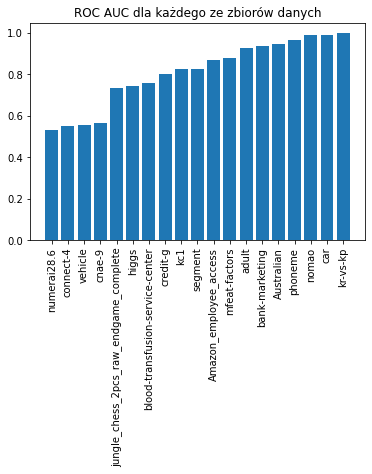

<Figure size 2000x1600 with 0 Axes>

In [10]:
plt.bar('Nazwa zbioru', 'AUC',data = df.sort_values(by='AUC',))
plt.title("ROC AUC dla każdego ze zbiorów danych")
plt.xticks(rotation=90)
plt.figure(figsize=(25, 20), dpi=80)
plt.show()

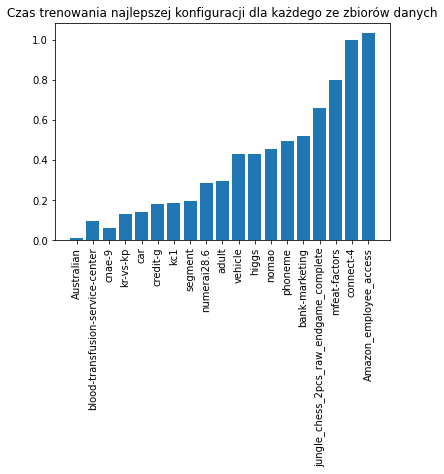

<Figure size 2000x1600 with 0 Axes>

In [11]:
plt.bar('Nazwa zbioru', "Czas trenowania najlepszej konfiguracji",data = df.sort_values(by="Czas trenowania najlepszej konfiguracji"))
plt.title("Czas trenowania najlepszej konfiguracji dla każdego ze zbiorów danych")
plt.xticks(rotation=90)
plt.figure(figsize=(25, 20), dpi=80)
plt.show()

Posumowanie:

In [12]:
df

,Nazwa zbioru,AUC,Czas trenowania najlepszej konfiguracji
0,credit-g,0.799907,0.180996
1,kr-vs-kp,0.999419,0.132000
2,blood-transfusion-service-center,0.750273,0.096999
3,kc1,0.826784,0.184034
4,blood-transfusion-service-center,0.759924,0.054997
5,vehicle,0.554425,0.427996
6,mfeat-factors,0.880514,0.798519
7,phoneme,0.963562,0.494997
8,bank-marketing,0.935787,0.517999
9,nomao,0.991572,0.452995


Średnia dokładność oraz czas wykonania:

In [14]:
print(np.mean(aucs))
print(np.mean(times))

0.807206753028782
0.3723735809326172


Zapisanie danych:

In [15]:
df.to_csv("Wyniki.csv")